In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Пусть задана совокупность точек $\{x_k\}_{k=0}^n$ и значения функции $f(x)$ в данных точках $\{f_k\}_{k=0}^n$.\
Будем считать, что $f(x)$ дифференцируема в некоторой окрестности точек $\{x_k\}_{k=0}^n$ достаточное количество раз.

**Задание (численное дифференцирование)**

Дана функция $f(x)$. Для неё необходимо:

1) Используя правую и центральные разности, численно вычислить первую производную функции $f(x)$ на отрезке $[a,b]$ в узлах сетки:
$$
f_k' = \frac{f_{k+1} - f_k}{h}, \qquad
f_k' = \frac{f_{k+1} - f_{k-1}}{2h}
$$
2) Используя центральные разности, вычислить вторую производную функции $f(x)$ со вторым и четвёртым порядком точности в узлах сетки:
$$
f_k'' = \frac{f_{k+1} - 2f_k + f_{k-1}}{h^2}, \qquad
f_k'' = \frac{-f_{k+2} + 16f_{k+1} - 30f_k + 16f_{k-1} - f_{k-2}}{12h^2}
$$
3) Построить графики численных производных, сравнить с аналитическим решением, вывести погрешности, проанализировать результаты.

**Функция для численного дифференцирования** (вариант 23):
$$
f(x) = (1 + \ln(x^2))\cos(e^x), \qquad 
x \in [0,2]
$$

In [14]:
def f(x):
    x = np.asarray(x, dtype = float)
    return (1 + np.log(x ** 2)) * np.cos(np.e ** x)

**Задание 1.**

In [139]:
def central_and_right_derivative(x, a, b, n, method):
    # x = np.linspace(a, b, n)
    h = x[1] - x[0]

    df_dx = np.zeros_like(x)

    if method == "right":
        for i in range(n - 1):
            df_dx[i] = (f(x[i] + h) - f(x[i])) / h
        # для последней точки - левая разность
        df_dx[-1] = (f(x[-1]) - f(x[-1] - h)) / h

    elif method == "central":
        for j in range(1, n - 1):
            df_dx[j] = (f(x[j] + h) - f(x[j] - h)) / (2 * h)
        # для первой точки - правая разность
        df_dx[0] = (f(x[j] + h) - f(x[j])) / h
        # для последней точки - левая разность
        df_dx[-1] = (f(x[-1]) - f(x[-1] - h)) / h

    return x, df_dx

Точная формула для первой производной $f(x)$:
$$
f'(x) = -\frac{\left( 2x e^x \ln\left( x\right) + x e^x\right) \sin\left( e^x\right) - 2\cos\left( e^x\right) }{x}
$$


In [140]:
def exact_derivative(x):
    return -((2*x*np.e**x*np.log(x) + x*np.e**x) * np.sin(np.e**x) - 2*np.cos(np.e**x))/(x)

In [146]:
a, b = 0.1, 2
n = 50
x = np.linspace(a, b, n)

x_forward, df_forward = central_and_right_derivative(x, a, b, n, "right")
x_central, df_central = central_and_right_derivative(x, a, b, n, "central")
# точное значение производной
df_exact = exact_derivative(x_forward)

print(f"Шаг сетки: {x_forward[1] - x_forward[0]:.6f}")

Шаг сетки: 0.038776


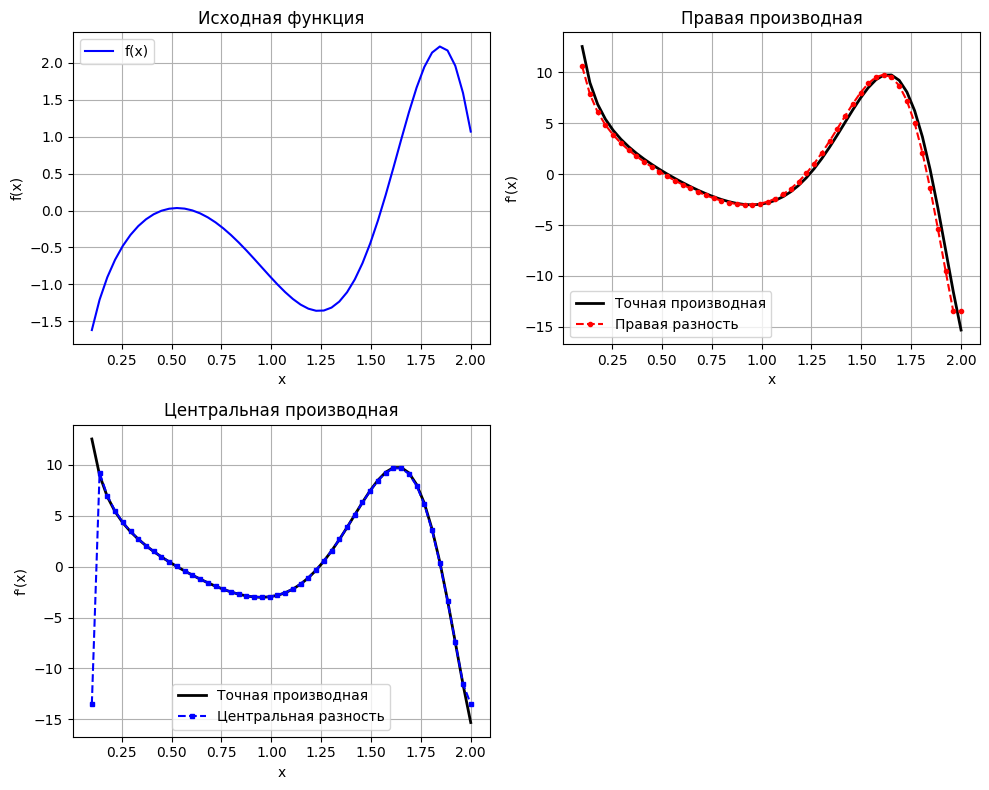

In [152]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.plot(x_forward, f(x_forward), 'b-', label='f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Исходная функция')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(x_forward, df_exact, 'k-', label='Точная производная', linewidth=2)
plt.plot(x_forward, df_forward, 'ro--', markersize=3, label='Правая разность')
plt.xlabel('x')
plt.ylabel("f'(x)")
plt.title('Правая производная')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(x_forward, df_exact, 'k-', label='Точная производная', linewidth=2)
plt.plot(x_forward, df_central, 'bs--', markersize=3, label='Центральная разность')
plt.xlabel('x')
plt.ylabel("f'(x)")
plt.title('Центральная производная')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
# Таблица с несколькими точками для демонстрации
# print("\nСравнение результатов в нескольких точках:")
# print("x\t\tТочная\t\tПравая\t\tЦентральная")
# print("-" * 55)
# indices = [0, n//4, n//2, 3*n//4, -1]
# for i in indices:
#     print(f"{x_forward[i]:.3f}\t\t{df_exact[i]:.6f}\t{df_forward[i]:.6f}\t{df_central[i]:.6f}")

**Задание 2.**

2й порядок точности для центральных разностей.

In [134]:
def second_derivative_2nd(x, a, b, n):
    # x = np.linspace(a, b, n)
    # n = len(x)
    h = x[1] - x[0]
    f2 = np.zeros_like(x)

    for i in range(1, n - 1):
        f2[i] = (f(x[i + 1]) - 2 * f(x[i]) + f(x[i - 1])) / (h ** 2)

    f2[0] = (f(x[2]) - 2 * f(x[1]) + f(x[0])) / (h ** 2)
    f2[-1] = (f(x[-1]) - 2 * f(x[-2]) + f(x[-3])) / (h ** 2)

    return x, f2    

4й порядок точности для центральных разностей.

In [135]:
def second_derivative_4nd(x, a, b, n):
    # x = np.linspace(a, b, n)
    # n = len(x)
    h = x[1] - x[0]
    
    d2f_dx2 = np.zeros_like(x)

    for i in range(2, n-2):
        d2f_dx2[i] = (-f(x[i+2]) + 16*f(x[i+1]) - 30*f(x[i]) + 16*f(x[i-1]) - f(x[i-2])) / (12*h**2)
    
    for i in [0, 1, n-2, n-1]:
        if i == 0:  # первая точка - правосторонняя разность
            d2f_dx2[i] = (f(x[i+2]) - 2*f(x[i+1]) + f(x[i])) / h**2
        elif i == 1:  # вторая точка - несимметричная формула
            d2f_dx2[i] = (f(x[i+1]) - 2*f(x[i]) + f(x[i-1])) / h**2
        elif i == n-2:  # предпоследняя точка
            d2f_dx2[i] = (f(x[i+1]) - 2*f(x[i]) + f(x[i-1])) / h**2
        else:  # последняя точка - левосторонняя разность
            d2f_dx2[i] = (f(x[i]) - 2*f(x[i-1]) + f(x[i-2])) / h**2
    
    return x, d2f_dx2

Точная формула для второй производной $f(x)$:
$$
f''(x) = -\frac{2\cos(e^x)}{x^2} - e^x \left( \frac{4}{x} + 2\ln x + 1 \right) \sin(e^x) - e^{2x} (2\ln x + 1) \cos(e^x)
$$

In [136]:
def exact_second_derivative(x):
    term1 = -2 * np.cos(np.exp(x)) / x**2
    term2 = -np.exp(x) * (4 / x + 2 * np.log(x) + 1) * np.sin(np.exp(x))
    term3 = -np.exp(2 * x) * (2 * np.log(x) + 1) * np.cos(np.exp(x))
    return term1 + term2 + term3

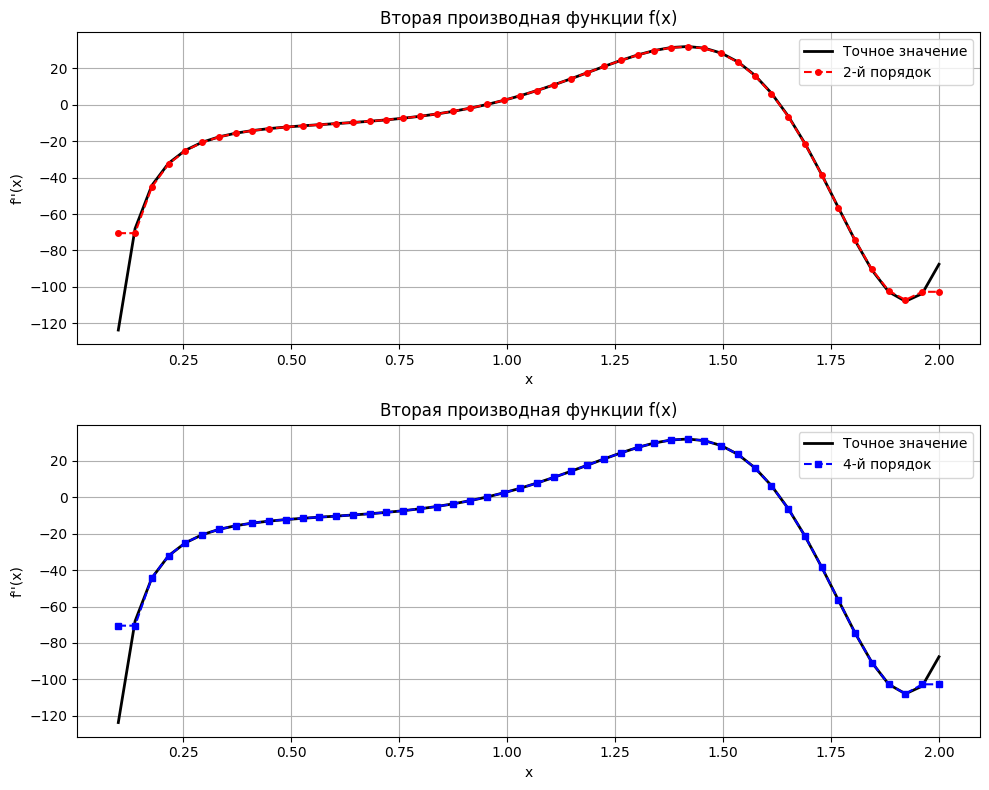

In [153]:
a, b = 0.1, 2
n = 50
x = np.linspace(a, b, n)

_, df2_2nd = second_derivative_2nd(x, a, b, n)
_, df2_4nd = second_derivative_4nd(x, a, b, n)
f2_exact = exact_second_derivative(x)

plt.figure(figsize = (10, 8))

plt.subplot(2, 1, 1)
plt.plot(x, f2_exact, 'k-', linewidth=2, label='Точное значение')
plt.plot(x, df2_2nd, 'ro--', markersize=4, label='2-й порядок')
plt.xlabel('x')
plt.ylabel("f''(x)")
plt.title('Вторая производная функции f(x)')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(x, f2_exact, 'k-', linewidth=2, label='Точное значение')
plt.plot(x, df2_4nd, 'bs--', markersize=4, label='4-й порядок')
plt.xlabel('x')
plt.ylabel("f''(x)")
plt.title('Вторая производная функции f(x)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()